<a href="https://colab.research.google.com/github/voleka-ocrv/AvitoAnalyticsAcademy/blob/main/ch3_normal_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 [Критерии сравнения средних](https://www.youtube.com/watch?v=QIzKGaXtD0o)

Допустим есть какое-то воздействие, которое мы вводим и оно должно оказать влияние навыручку.

Тест: 1000 человек → $ARPU_т$

Контроль: 1000 человек → $ARPU_с$

$ARPU_т > ARPU_с$

На предыдущем шаге у нас была задача про заказы, где из 30 заказов - 19 конвертировалис в покупки, 19 - нет.

$ξ ∼ Bernoulli(p)$

Среднее по выборке, засемплированной из бернулевского распределения $\bar{x}$

Мы могли сформулировать нулевую гипотезу относительно верноятности p

$H0: p=50%$ или

могли сформулировать через мат.ожидание ξ ($𝔼(ξ)$)

$H0: 𝔼(ξ) = 50%$

ARPU

# 3.1/1 [Нормальное распределение](https://www.youtube.com/watch?v=2Yd1AiOsgZk&list=PLMv83iwSomR0LpdnMd3xWn_Wgx_VzMkr8&index=12)

Самые частрые задачи - это сравнение СРЕДНЕГО
Пример с Выручкой
Пусть, мы внедрили новый продукт, который влияет на средний чек пользователя - т.е. траты пользователя за 1 месяц.

ξ - средние траты 1 пользователя за 1 месяц

Распределение ξ нам неизвестно, но мы можем сказать, что это точно не нормальное распределение

Мы хотим найти мат.ожидание генеральной совокупности. А точнее проверить гипотезу (H0) о том, что матожидание равно некоторому μ.

$H0: 𝔼_ξ = μ$

Чтобы проверить гипотезу, надо придумать некоторую статистику, для которой мы будем проверять как она распределена.

Нам это поможет сделать ЦТП.

##ЦПТ
ЦПТ утверждает, что если у нас есть n таких случайных величин, которые одинаково распределены по какому-то закону (например, средние чеки пользователей) и они независимы, то эта сумма, будет распределена по нормальному закону.

$\sum_{n=1}^{n}ξ_i (n → ∞) Norm(n*μ, (n* σ)^2 )$

## Нормальное распределение
Непрерывное распределение мы будем определять через его плотность.

$f_{Norm(μ, σ^2)}(x) = e^{-\frac{(x-μ)^2}{σ^2}}$

Таким образом,
- максимальная плотность будет в точке, где x = μ, т.е. где  (x - μ) = 0
- чем больше разность (x - μ), тем больше будет показатель экспоненты, тем меньше будет плотность
- экспонента растет быстро, значит f(x) в точке x далекой от μ будет околонулевым
- насколько быстрый характер падения, определяется $σ^2$. Если $σ^2$ маленькая, то график будет падать быстро, если $σ^2$ большая, то график будет падать медленно.

Преобразуме формулу таким образом, чтобы площадь под графиком приходила в 1.

$f_{Norm(μ, σ^2)}(x) = e^{-\frac{(x-μ)^2}{σ^2}}$

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

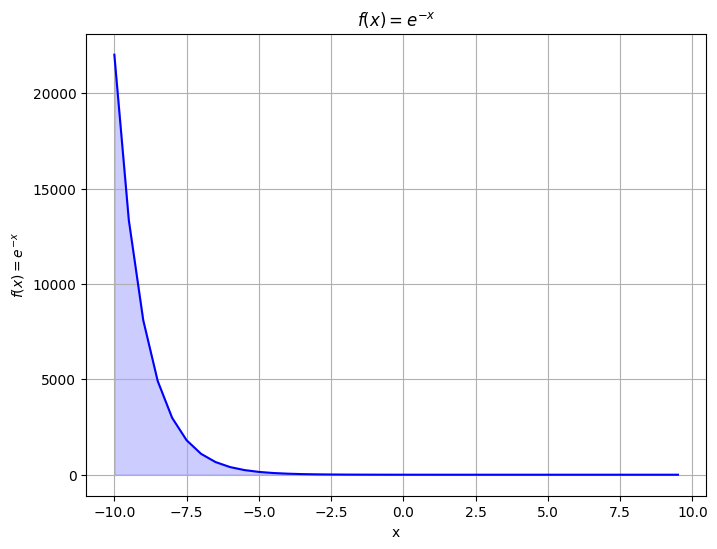

In [11]:
#@title $f(x) = e^{-x}$
x = np.arange(-10, 10, 0.5)
y = np.exp(-x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue')
plt.title('$f(x) = e^{-x}$')
plt.xlabel('x')
plt.ylabel('$f(x) = e^{-x}$')
plt.grid(True)
plt.fill_between(x, y, alpha=0.2, color='blue')  # Fill under the curve
plt.show()


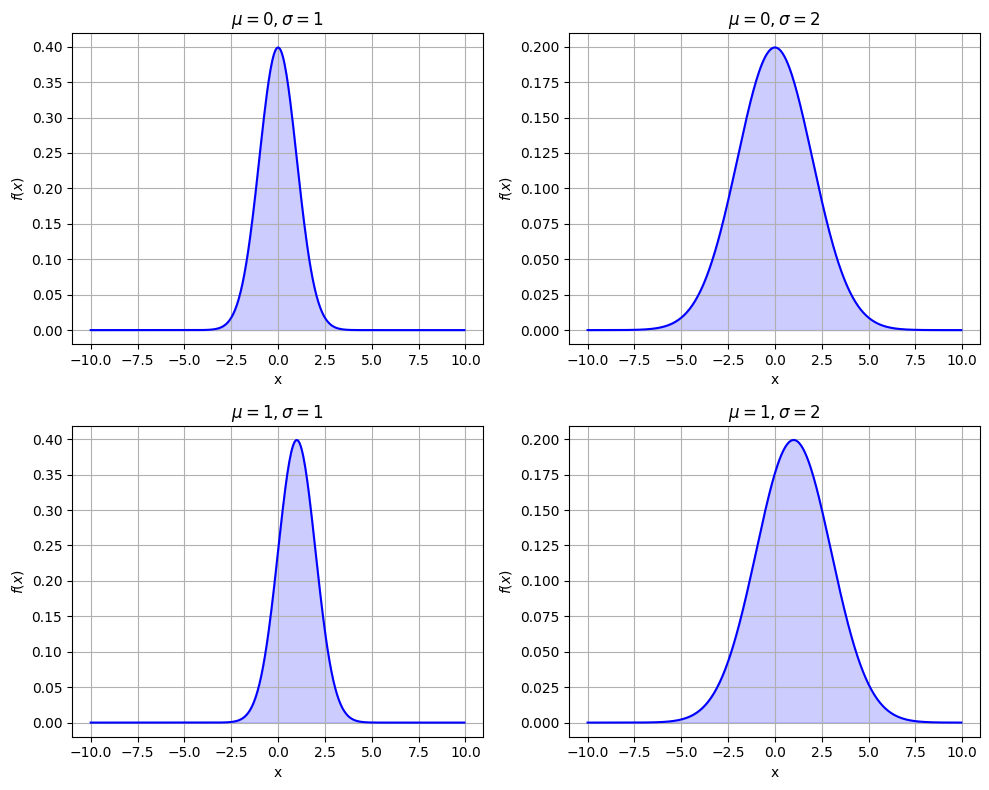

In [10]:
#@title График нормального распределения $f_{Norm(μ, σ^2)}(x) = e^{-\frac{(x-μ)^2}{σ^2}}$
import numpy as np
import matplotlib.pyplot as plt

# Define x values
x = np.arange(-10, 10, 0.05)
sigma = 1

# Define a function to calculate Gaussian distribution
def gaussian(x, mu, sigma):
    return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2) / (sigma * np.sqrt(2 * np.pi))

mu_values = [0, 1]
sigma_values = [1, 2]
# titles = ["Original (mu=0)", "mu=-1", "mu=1", "mu=2"]

# Create subplots
fig, axis = plt.subplots(2, 2, figsize=(10, 8))
# axes = axes.flatten()  # Flatten the 2D array of axes

for i, mu in enumerate(mu_values):
  for j, sigma in enumerate(sigma_values):
    y = gaussian(x, mu, sigma)
    axis[i,j].plot(x, y, color='blue')
    axis[i,j].fill_between(x, y, alpha=0.2, color='blue')  # Fill under the curve
    axis[i,j].set_title(f"$\mu = {mu}, \sigma = {sigma}$")
    axis[i,j].set_xlabel('x')
    axis[i,j].set_ylabel('$f(x)$')
    axis[i,j].grid(True)

plt.tight_layout()
plt.show()


#Как пользоваться нормальным распределением в Python
Пусть мы хотим задать распределение $𝒩(\mu,σ^2)$. Для этого есть класс `norm`.

Параметры инициализации:
- `loc` - это μ
- `scale` - это σ, или стандартное отклонение. Не дисперсия!

Методы класса:
- `norm().cdf(x)` - функция распределения в точке x. $ℙ(ξ ≤ x)$
- `norm().ppf(q)` - получить квантиль распределения
- `norm().pdf(x)` - получить плотность распределения в точке x.

In [13]:
from scipy.stats import norm

In [14]:
# инициализация
stand_norm = norm(loc=0, scale=1)

In [16]:
# cumulative distribution function
print(f"P(norm <= 2) = {stand_norm.cdf(x=2)}")

# можно указвать массивы
print(f"[P(norm <= 2), P(norm <= -1)] = {stand_norm.cdf(x=[2, -1])}")

P(norm <= 2) = 0.9772498680518208
[P(norm <= 2), P(norm <= -1)] = [0.97724987 0.15865525]


In [17]:
# percent point function
print(f"quantile 0.975 = {stand_norm.ppf(0.975)}")

quantile 0.975 = 1.959963984540054


In [18]:
# probably density function
print(f"pdf(0) = {stand_norm.pdf(0.0)}")

pdf(0) = 0.3989422804014327


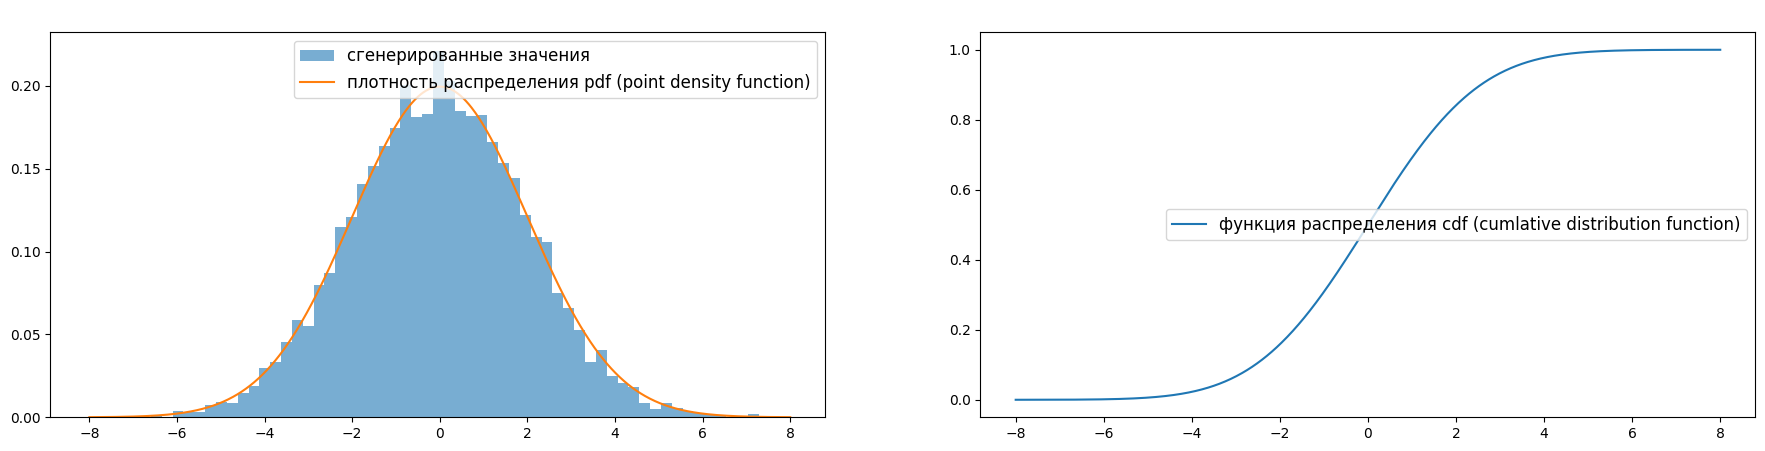

In [32]:
#@title Нарисуем график нормального распределения
check_distr = norm(loc=0, scale=2)
x= np.linspace(-8, 8, 1000) # расставит на равных расстоя
pdf = check_distr.pdf(x)
cdf = check_distr.cdf(x)

sample = check_distr.rvs(10000)

plt.figure(figsize=(22, 5))
plt.subplot(1, 2, 1)
plt.title('Визуализация плотности', fontsize = 12 , color='white')
plt.hist(sample, bins='auto', density=True, alpha = 0.6, label='сгенерированные значения') #rvs
plt.plot(x, pdf, label='плотность распределения pdf (point density function)') # pdf
plt.legend(fontsize=12)
plt.subplot(1, 2, 2)
# plt.title('Визуализация функции распределения', fontsize = 12)
plt.plot(x, cdf, label='функция распределения cdf (cumlative distribution function)') # cdf
plt.legend(fontsize=12)
plt.show()

#Свойство нормального распределения
Утверждается, что если у нас есть 2 случайные величины $ξ_1$ и $ξ_2$ распределенные нормально со следующими параметрами:

$ξ_1 ∼ 𝒩(μ_1, σ_1^2)$

$ξ_2 ∼ 𝒩(μ_2, σ_2^2)$

1. Сумма этих случайных величин (если они независимы) распределена по Нормальному распределению, причем характеристики этого распределения можно получить сложением параметров этих распределений:

$ξ_1+ξ_2 ∼ 𝒩(μ_1+μ_2, σ_1^2+σ_2^2)$

2. Если взять константу $a$, то случайная велиина $a*ξ_1$ будет иметь распределение:

$a*ξ_1 ∼ 𝒩(a*μ_1, a*σ_1^2)$

#Описание статистики для критерия и понимание как будет распределена статистика

1. Перейдем от суммы к среднему разделив сумму на количество элементов в выборке.

$\frac{\sum_{n=1}^{n}ξ_i}{n} = \bar{ξ} ∼ Norm(μ, \frac{σ^2}{n} )$

2. Из правой и из левой части вычтем \mu
Чтобы вычесть μ как распределение, представляем его в виде нормального распределения со средним μ и дисперсией 0

$\bar{ξ}-μ ∼ Norm(0, \frac{σ^2}{n} )$

3. Разделим на $\frac{σ}{\sqrt{n}}$ и получим

$\frac{\bar{ξ}-μ}{\sqrt{n}} ∼ Norm(0, 1)$

Т.о. мы получили стандартное нормальное распределение

Это статистика нашего произвольного распределения, которая в итоге распределена нормально.

# 3.2. [Z-тест](https://www.youtube.com/watch?v=nY9Uk5-2fqA)

Задача

Вы придумали идею для стартапа, где курьеры собирают заказы для клиентов и отвозят им на дом. Стоимость заказа в вашем стартапа 10К Р, а стоимость работы курьера - 5К Р. Специфика вашего стартапа такова, что есть большой риск возврата без оплаты. С учетом стоимостей, инвесторы готовы проспонсировать вам инфраструктуру и привлечение клиентов, если вы покажете, что шанс оплаты заказа больше 50%ю Вы своими силами обработали 30 заказов, 19 из них были успешно оплачены. Достаточно ли этих данных, чтобы убедить инвесторов?

У нас есть выборка $X_{1}, X_{2} ,...X_{n},\ X_i ∼ Bernoulli(μ)$

$H_0: μ = \mu_{0} =0.5\ vs.\ H_1 : μ>0.5$